# Data-Preprocessing for Forex market Analysis

## Importing pre-requisite modules and reading the csv file

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [76]:
df = pd.read_csv(r"C:\Users\sitadmin\Desktop\Hevardhan\Forex-market-analysis\datasets\datasets\eurusd\eurusd_h1.csv")

### Removing the unwanted columns

In [77]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

### Size of the Dataset

In [78]:
df_original = df
size_of_df = len(df)
size_of_df

61994

## Adding Rolling Averages of Period 10 and 20

In [79]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [80]:
#Checking for Null Values
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [81]:
df

,time,open,high,low,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29443,1.29525,1.29368,1.29429,0,NaN,NaN
1,2012-01-02 01:00:00,1.29434,1.29486,1.29315,1.29410,0,NaN,NaN
2,2012-01-02 02:00:00,1.29418,1.29471,1.29359,1.29387,0,NaN,NaN
3,2012-01-02 03:00:00,1.29387,1.29391,1.29220,1.29307,0,NaN,NaN
4,2012-01-02 04:00:00,1.29308,1.29464,1.29211,1.29255,0,NaN,NaN
...,...,...,...,...,...,...,...,...
61989,2021-12-30 20:00:00,1.13150,1.13164,1.13038,1.13060,0,1.131937,1.132641
61990,2021-12-30 21:00:00,1.13060,1.13298,1.13043,1.13272,0,1.132192,1.132480
61991,2021-12-30 22:00:00,1.13271,1.13303,1.13184,1.13193,0,1.132220,1.132318
61992,2021-12-30 23:00:00,1.13194,1.13276,1.13194,1.13257,0,1.132218,1.132217


## Simple visualization to explain Moving Average Crossover technique 

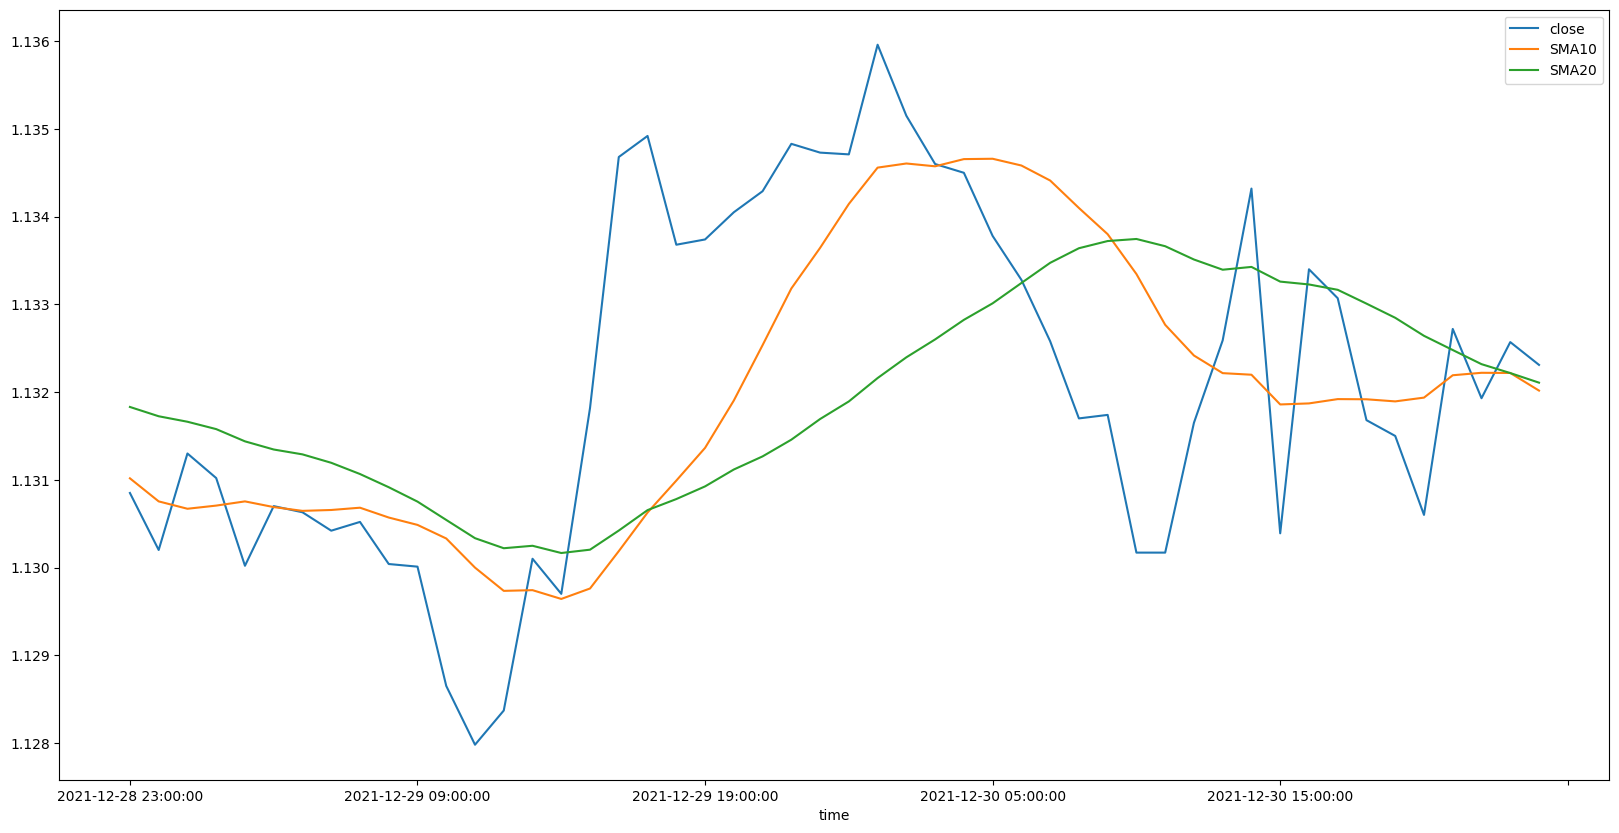

In [82]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

## Adding Signals to the Dataset

In [83]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [84]:
df['Signal'].value_counts()

Signal
0.0    31104
1.0    30866
Name: count, dtype: int64

### Filtering the signals - inorder to plot them as points

In [85]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

### Categorizing the signals as Buy and Sell

In [86]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [87]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
61944,2021-12-28 23:00:00,1.13117,1.13142,1.13078,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13086,1.13126,1.12995,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13020,1.13143,1.13020,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13132,1.13136,1.13066,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13103,1.13117,1.12975,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13002,1.13073,1.12979,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13070,1.13093,1.13047,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13063,1.13068,1.13031,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13041,1.13073,1.13032,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13051,1.13062,1.12999,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN


## Calculating Total Profit for these Signals

In [88]:
df['Profit'] = np.NaN

In [89]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [90]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 19:00:00,1.29278,1.29308,1.29203,1.29259,0,1.293392,1.293392,1.0,1.0,1.29259,NaN,NaN
20,2012-01-02 20:00:00,1.29259,1.29290,1.29242,1.29274,0,1.293113,1.293314,0.0,0.0,NaN,1.29274,0.00015
27,2012-01-03 03:00:00,1.29710,1.29882,1.29707,1.29779,0,1.294098,1.293867,1.0,1.0,1.29779,NaN,-0.00505
54,2012-01-04 06:00:00,1.30352,1.30356,1.30262,1.30336,0,1.304315,1.304454,0.0,0.0,NaN,1.30336,0.00557
130,2012-01-09 10:00:00,1.27689,1.27791,1.27511,1.27759,0,1.271596,1.271572,1.0,1.0,1.27759,NaN,0.02577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61937,2021-12-28 16:00:00,1.13214,1.13229,1.12922,1.13066,0,1.132450,1.132531,0.0,0.0,NaN,1.13066,-0.00217
61963,2021-12-29 18:00:00,1.13493,1.13535,1.13357,1.13368,0,1.130991,1.130780,1.0,1.0,1.13368,NaN,-0.00302
61979,2021-12-30 10:00:00,1.13175,1.13179,1.13002,1.13017,0,1.133346,1.133746,0.0,0.0,NaN,1.13017,-0.00351
61992,2021-12-30 23:00:00,1.13194,1.13276,1.13194,1.13257,0,1.132218,1.132217,1.0,1.0,1.13257,NaN,-0.00240


## Categorizing the signals as "Profit" and "Loss"

In [91]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [92]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
20,2012-01-02 20:00:00,1.29259,1.29290,1.29242,1.29274,0,1.293113,1.293314,0.0,0.0,NaN,1.29274,0.00015,Profit
54,2012-01-04 06:00:00,1.30352,1.30356,1.30262,1.30336,0,1.304315,1.304454,0.0,0.0,NaN,1.30336,0.00557,Profit
130,2012-01-09 10:00:00,1.27689,1.27791,1.27511,1.27759,0,1.271596,1.271572,1.0,1.0,1.27759,NaN,0.02577,Profit
197,2012-01-12 05:00:00,1.27183,1.27230,1.27145,1.27166,0,1.271226,1.271195,1.0,1.0,1.27166,NaN,0.00357,Profit
230,2012-01-13 14:00:00,1.27773,1.27903,1.27231,1.27246,0,1.281438,1.281767,0.0,0.0,NaN,1.27246,0.00080,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61866,2021-12-23 13:00:00,1.13265,1.13296,1.13183,1.13240,0,1.133069,1.133069,0.0,0.0,NaN,1.13240,0.00199,Profit
61878,2021-12-24 01:00:00,1.13276,1.13290,1.13215,1.13231,0,1.132510,1.132422,1.0,1.0,1.13231,NaN,0.00009,Profit
61917,2021-12-27 20:00:00,1.13267,1.13297,1.13247,1.13257,0,1.131990,1.131972,1.0,1.0,1.13257,NaN,0.00011,Profit
61932,2021-12-28 11:00:00,1.13232,1.13308,1.13208,1.13308,0,1.132517,1.132578,0.0,0.0,NaN,1.13308,0.00051,Profit


In [93]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
61944,2021-12-28 23:00:00,1.13117,1.13142,1.13078,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13086,1.13126,1.12995,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13020,1.13143,1.13020,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13132,1.13136,1.13066,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13103,1.13117,1.12975,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13002,1.13073,1.12979,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13070,1.13093,1.13047,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13063,1.13068,1.13031,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13041,1.13073,1.13032,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13051,1.13062,1.12999,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN,NaN,NaN


In [94]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']

In [95]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category,Filter-by-profit(BUY),Filter-by-profit(SELL)
61944,2021-12-28 23:00:00,1.13117,1.13142,1.13078,1.13085,0,1.131017,1.131830,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61945,2021-12-29 00:00:00,1.13086,1.13126,1.12995,1.13020,0,1.130754,1.131725,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61946,2021-12-29 01:00:00,1.13020,1.13143,1.13020,1.13130,0,1.130670,1.131662,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61947,2021-12-29 02:00:00,1.13132,1.13136,1.13066,1.13102,0,1.130706,1.131578,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61948,2021-12-29 03:00:00,1.13103,1.13117,1.12975,1.13002,0,1.130754,1.131439,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61949,2021-12-29 04:00:00,1.13002,1.13073,1.12979,1.13070,0,1.130689,1.131346,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61950,2021-12-29 05:00:00,1.13070,1.13093,1.13047,1.13063,0,1.130646,1.131290,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61951,2021-12-29 06:00:00,1.13063,1.13068,1.13031,1.13042,0,1.130656,1.131194,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61952,2021-12-29 07:00:00,1.13041,1.13073,1.13032,1.13052,0,1.130682,1.131066,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61953,2021-12-29 08:00:00,1.13051,1.13062,1.12999,1.13004,0,1.130570,1.130915,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis - Part 1 : General Analysis

In [96]:
profit_size = len(df[df['Category']=='Profit'])
total_signal = len(df[df['Signal-Filtered'].isna()==False])
profit_percent = round((profit_size/total_signal)*100,2)
profit_percent

37.59

In [97]:
obs_df = pd.read_csv(r"C:\Users\sitadmin\Desktop\Hevardhan\Forex-market-analysis\Observation.csv")
del obs_df['Unnamed: 0']

In [100]:
input_text = input("Enter Timeframe")
obs_df.loc[len(obs_df.index)+1]=[input_text,profit_percent]

In [101]:
obs_df.to_csv(r"C:\Users\sitadmin\Desktop\Hevardhan\Forex-market-analysis\Observation.csv")

,TimeFrame,Profit Percentage
1,M15,37.59
2,M15,37.59
